## Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load dữ liệu

In [2]:
df = pd.read_csv('ToyotaCorolla.csv')
df

,Price,Age,Kilometers,Fuel_Type,HP,Metallic,Color,Automatic,CC,Doors,Quarterly_Tax,Weight
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,Blue,0,1300,3,69,1025
1432,10845,72,19000,Petrol,86,0,Grey,0,1300,3,69,1015
1433,8500,71,17016,Petrol,86,0,Blue,0,1300,3,69,1015
1434,7250,70,16916,Petrol,86,1,Grey,0,1300,3,69,1015


## 1. Hãy trực quan hóa các thông tin thống kê mô tả cho các biến.

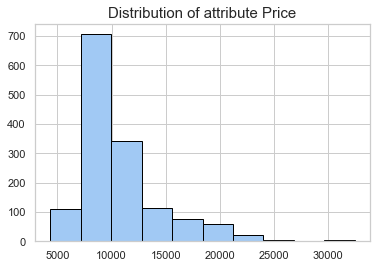

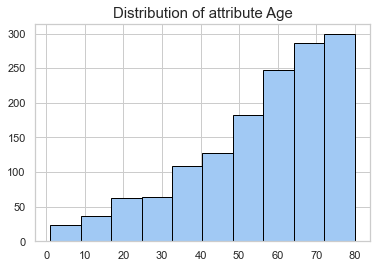

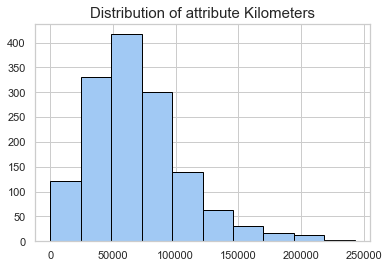

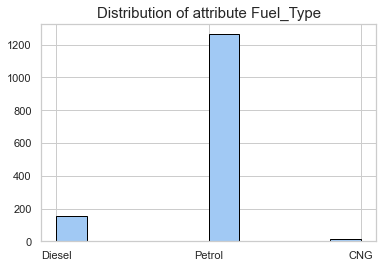

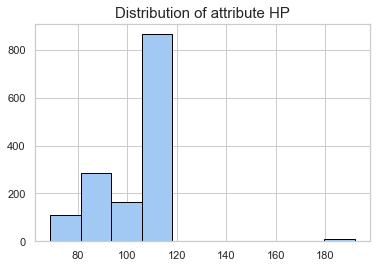

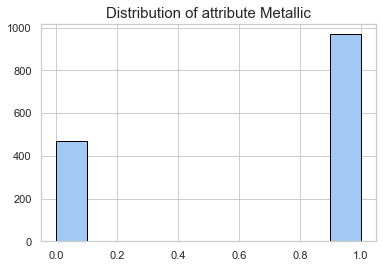

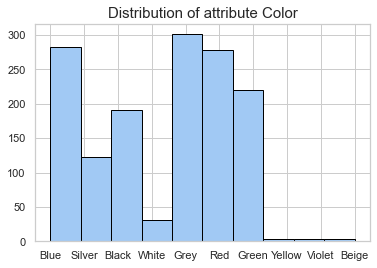

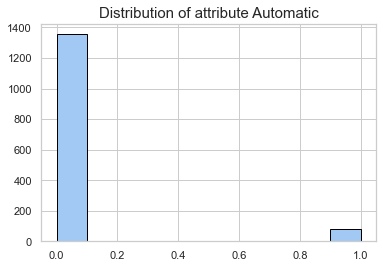

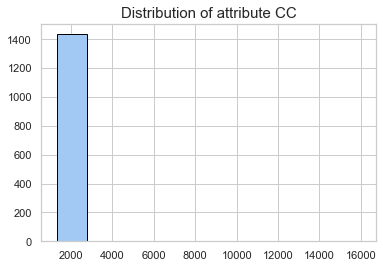

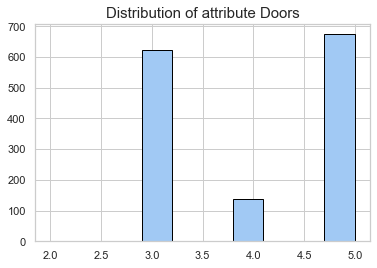

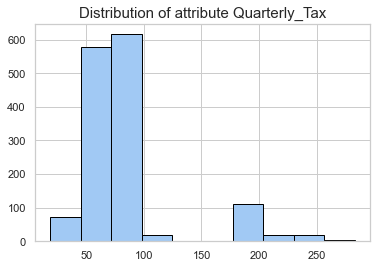

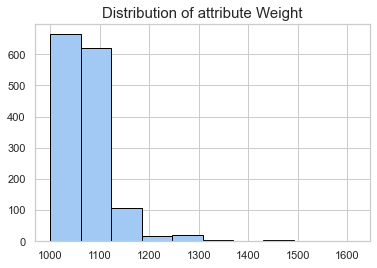

In [3]:
sns.set_theme(style="whitegrid", palette="pastel")

columns = df.columns
for column in columns:
    plt.hist(df[column], edgecolor = 'black');
    plt.title(f'Distribution of attribute {column}', fontsize = 15)
    plt.show()

## 2. Tìm và trực quan mối quan hệ tương quan giữa các cặp biến (nếu có).

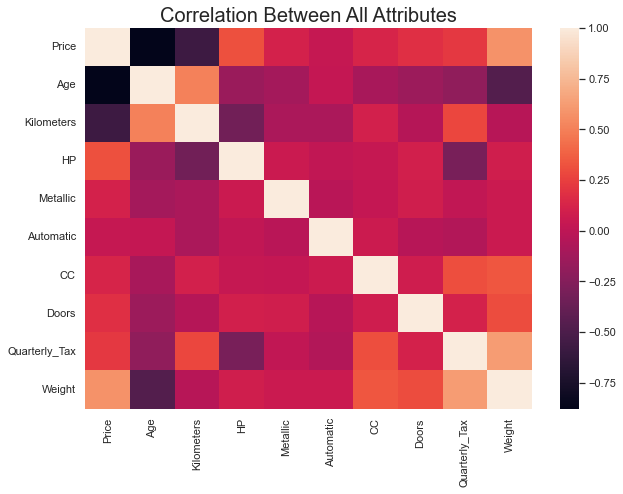

In [4]:
plt.figure(figsize = (10,7))
corr = df.corr()
sns.heatmap(corr)
plt.title('Correlation Between All Attributes', fontsize = 20);

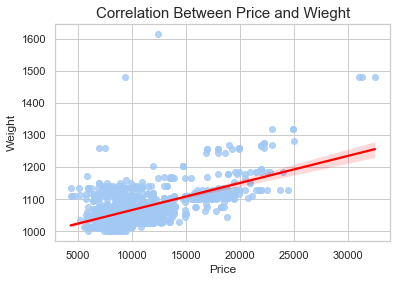

In [5]:
sns.regplot(x = 'Price', y = 'Weight', data = df, line_kws = {'color': 'red'})
plt.title('Correlation Between Price and Wieght', fontsize = 15);

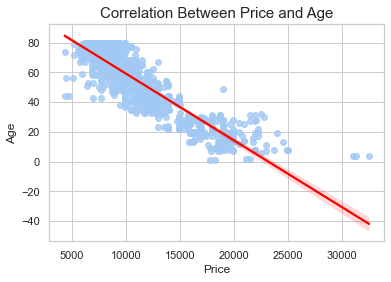

In [6]:
sns.regplot(x = 'Price', y = 'Age', data = df, line_kws = {'color': 'red'})
plt.title('Correlation Between Price and Age', fontsize = 15);

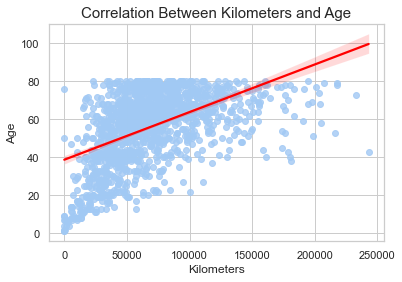

In [7]:
sns.regplot(x = 'Kilometers', y = 'Age', data = df, line_kws = {'color': 'red'})
plt.title('Correlation Between Kilometers and Age', fontsize = 15);

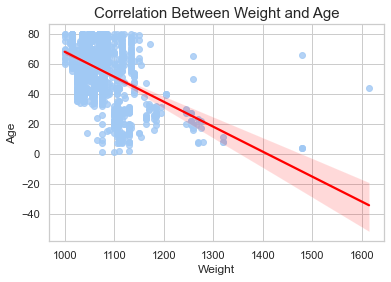

In [8]:
sns.regplot(x = 'Weight', y = 'Age', data = df, line_kws = {'color': 'red'})
plt.title('Correlation Between Weight and Age', fontsize = 15);

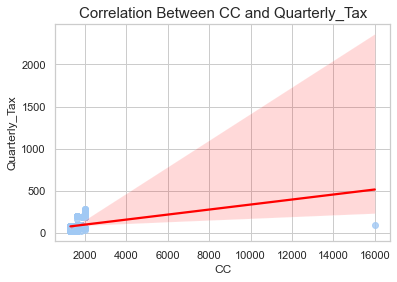

In [9]:
sns.regplot(x = 'CC', y = 'Quarterly_Tax', data = df, line_kws = {'color': 'red'})
plt.title('Correlation Between CC and Quarterly_Tax', fontsize = 15);

## 3. Hãy trực quan hóa biểu đồ histogram cho Price theo từng biến biến

### Fuel_Type

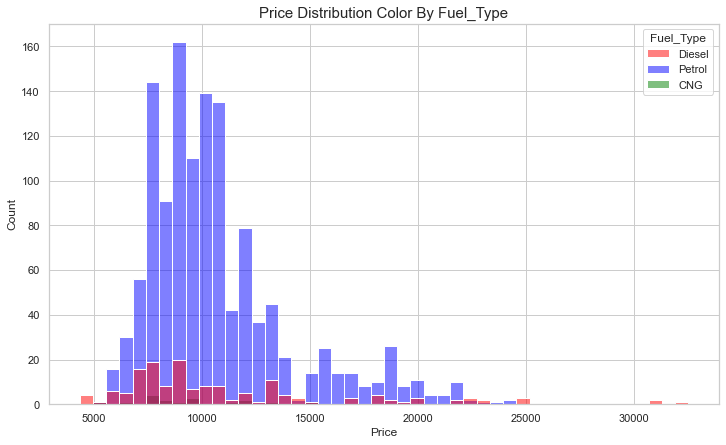

In [10]:
plt.figure(figsize = (12,7))
sns.histplot(x = 'Price', data = df, hue = 'Fuel_Type', palette = ['red', 'blue','green']);
plt.title('Price Distribution Color By Fuel_Type', fontsize = 15);

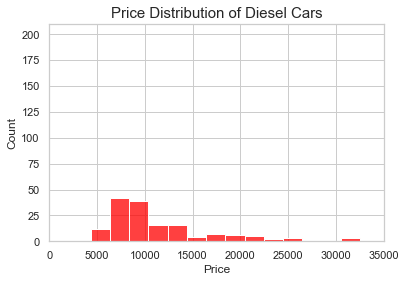

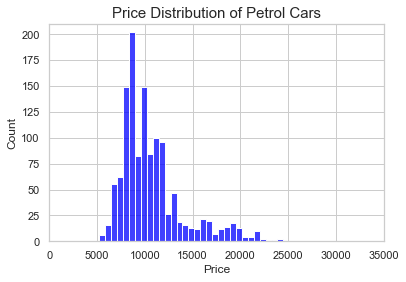

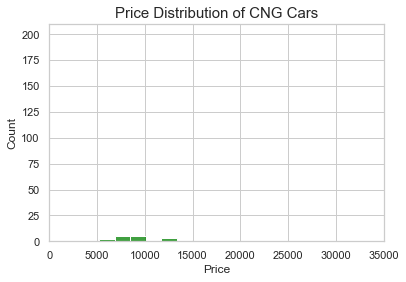

In [11]:
fuels = df.Fuel_Type.unique()
colors = ['red','blue','green']

for fuel, color in zip(fuels, colors):
    data = df[df.Fuel_Type == fuel]
    sns.histplot(x = 'Price', data = data, color = color)
    plt.ylim(0,210)
    plt.xlim(0,35000)
    plt.title(f'Price Distribution of {fuel} Cars', fontsize = 15 )
    plt.show()

### Color

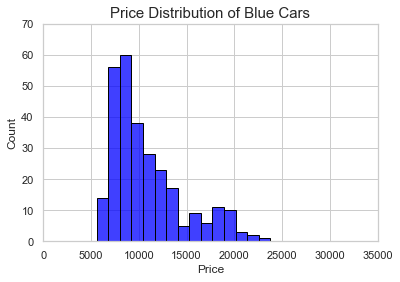

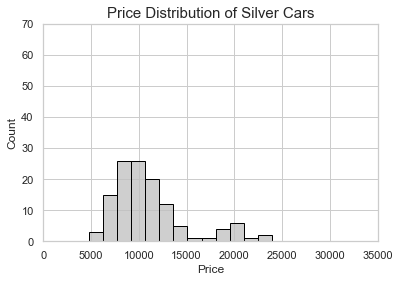

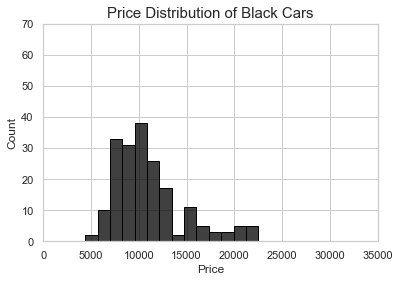

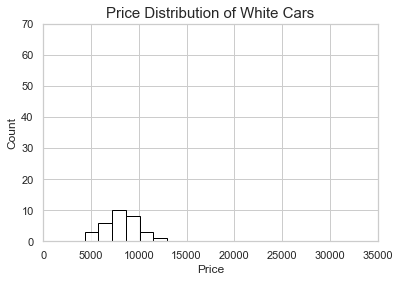

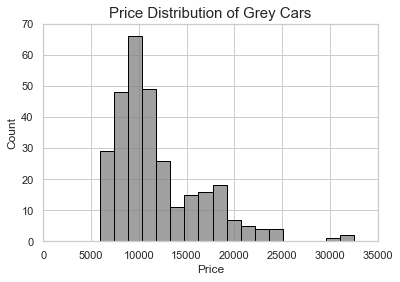

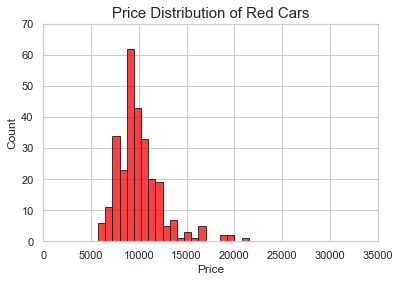

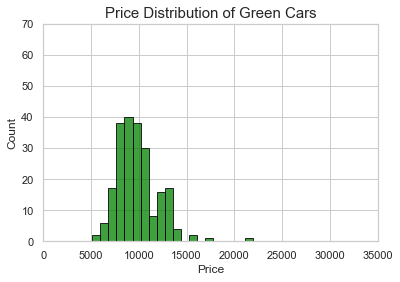

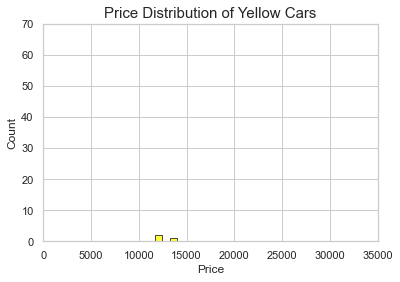

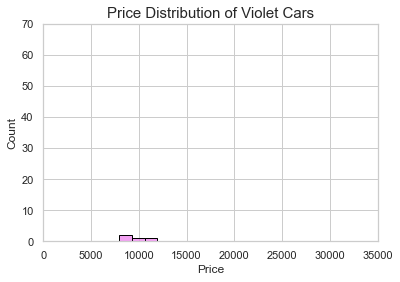

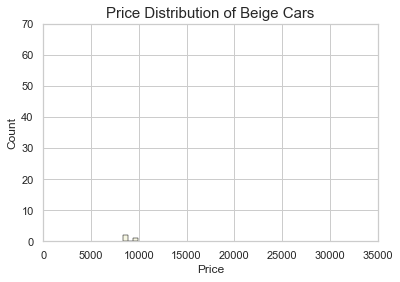

In [12]:
car_colors = df.Color.unique()

for color in car_colors:
    data = df[df.Color == color]
    plt.ylim(0,70)
    plt.xlim(0,35000)
    sns.histplot(x = 'Price', data = data, color = color, edgecolor = 'black')
    plt.title(f'Price Distribution of {color} Cars', fontsize = 15)
    plt.show()

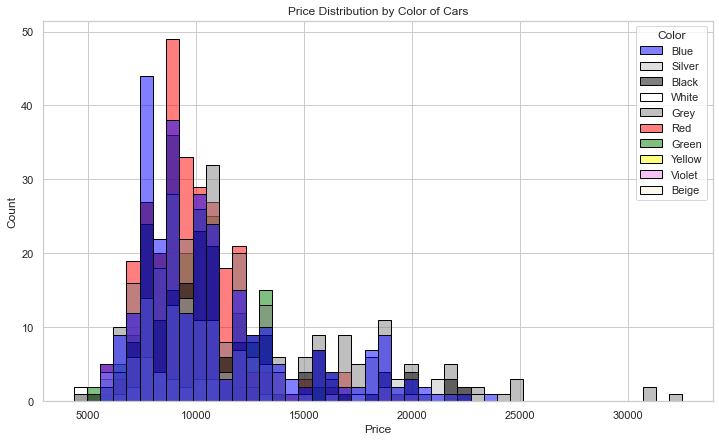

In [13]:
plt.figure(figsize = (12,7))
sns.histplot(x = 'Price', data = df, hue = 'Color', palette= car_colors.tolist(), edgecolor = 'black',);
plt.title(f'Price Distribution by Color of Cars');

## 4. Hãy đưa ra mô hình dự báo về giá xe Price

### Preprocessing

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Separating X and Y with Y is Price col and X are other cols
X = df.drop(columns = 'Price')
Y = df.Price 


# Change Categorical Cols to Numeric Cols
fuels = X.Fuel_Type.unique()
numeric_fuels = [i*1000 for i in range(len(fuels))]

for fuel, numeric_fuel in zip(fuels, numeric_fuels):
    X['Fuel_Type'] = X.Fuel_Type.str.replace(fuel, f'{numeric_fuel}')

X['Fuel_Type'] = X.Fuel_Type.astype('int')

X.Fuel_Type.astype('int')

colors = X.Color.unique()
numeric_colors = [i*100 for i in range(len(colors))]

for color, numeric_color in zip(colors, numeric_colors):
    X['Color'] = X.Color.str.replace(color, f'{numeric_color}')

X['Color'] = X.Color.astype('int')


# Standardize using Z-score:
columns = X.columns

for col in columns:
    mean = X[col].mean()
    std = X[col].std(ddof = 1)
    X[col] = (X[col]-mean)/std

Y_mean = Y.mean()
Y_std = Y.std(ddof = 1)
Y = (Y - Y_mean)/Y_std

### Predict With Stochastic Gradient Descent using Sklearn.

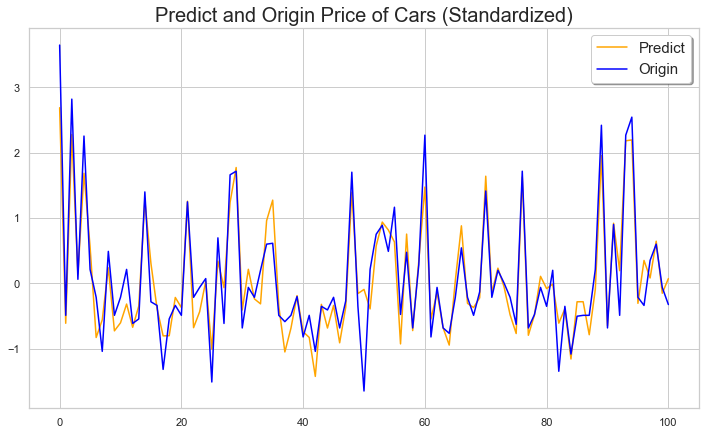

In [15]:
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, test_size = 0.07)


SGD = linear_model.SGDRegressor(loss = 'squared_error')
SGD.fit(X_train, Y_train)


Y_predict = SGD.predict(X_test)

plt.figure(figsize = (12,7))

plt.plot(Y_predict, color = 'orange', label = 'Predict')
plt.plot(Y_test.values, color = 'blue', label = 'Origin')
plt.title('Predict and Origin Price of Cars (Standardized)', fontsize = 20)
plt.legend(fancybox = True, shadow = True,fontsize=15);

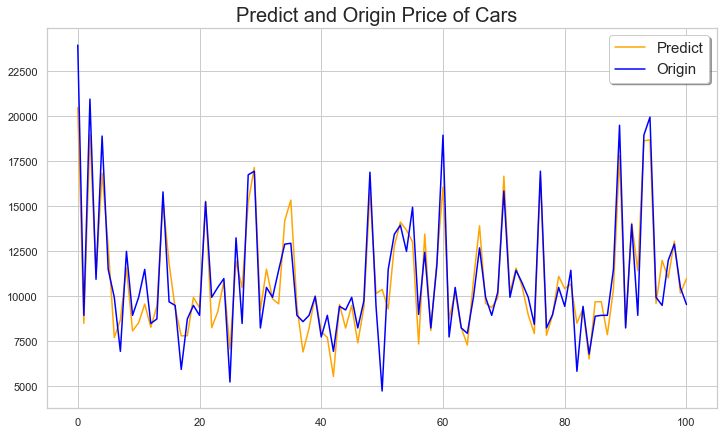

In [16]:
Y_test = Y_test * Y_std + Y_mean
Y_predict = Y_predict * Y_std + Y_mean

plt.figure(figsize = (12,7))

plt.plot(Y_predict, color = 'orange', label = 'Predict')
plt.plot(Y_test.values, color = 'blue', label = 'Origin')
plt.legend(fancybox = True, shadow = True, fontsize = 15)
plt.title('Predict and Origin Price of Cars  ', fontsize = 20)
plt.show();